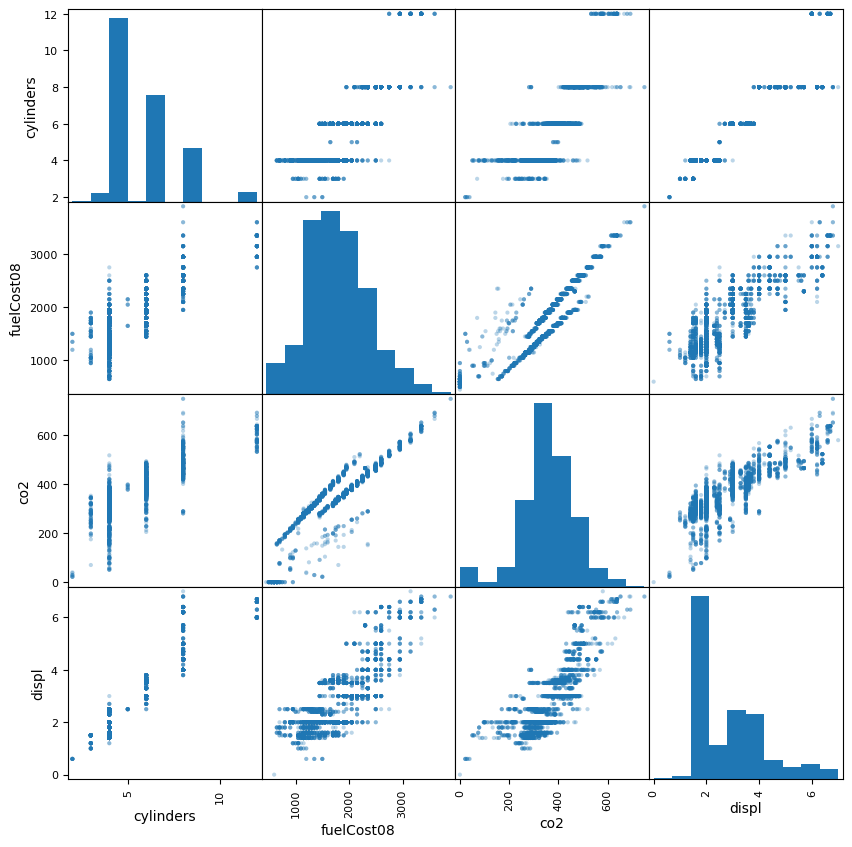

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/EPA_fuel_economy.csv")

# Get 6 most common classes
counts = df['VClass'].value_counts()
car_class = counts.index.tolist()[0:6]
car_class

# Filter dataframe down to manageable size
car_class_df = (df[['cylinders', 'fuelCost08', 'co2', 'VClass', 'displ', 'trany', 'year']]
                .query('VClass in @car_class & year >= 2015')
                .drop(columns = ['year']))

trans = car_class_df.copy()['trany']
trans.loc[trans.str.contains('Man')] = "Manual"
trans.loc[trans.str.contains('Auto')] = "Automatic"

car_class_df = (car_class_df
               .assign(transmission = trans)
               .drop(columns = ['trany']))

scatter_matrix(car_class_df, figsize=(10,10), alpha = 0.3);

In [ ]:
car_class_df.head()

In [ ]:
# trans = car_class_df['trany']
car_class_df.info()

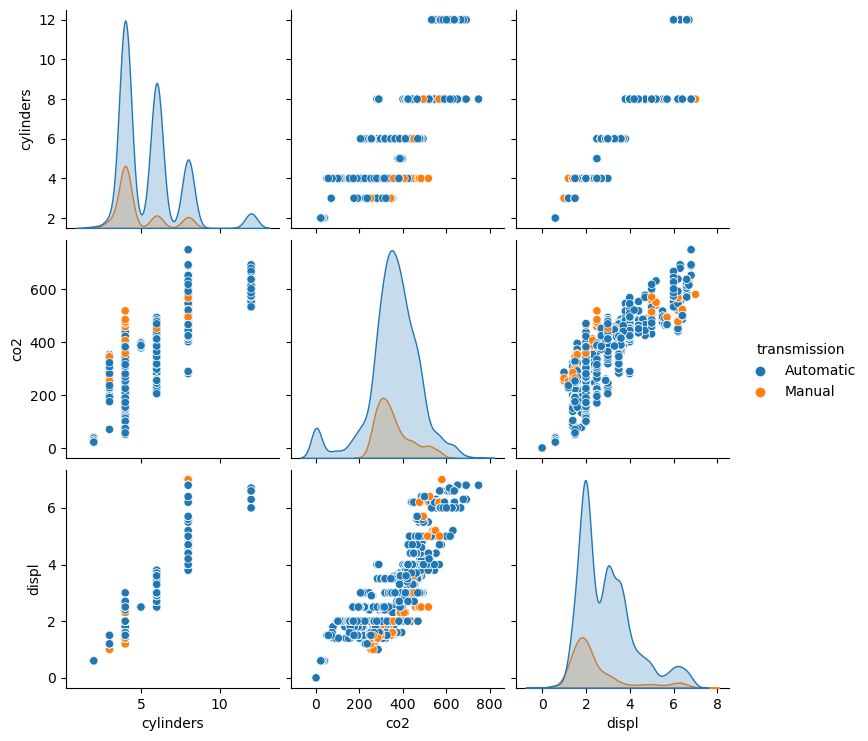

In [12]:
g = sns.pairplot(car_class_df,
             x_vars = ['cylinders', 'co2', 'displ'],
             y_vars = ['cylinders', 'co2', 'displ'],
             hue = 'transmission')
g;

In [8]:
g.savefig("pairplot.svg")

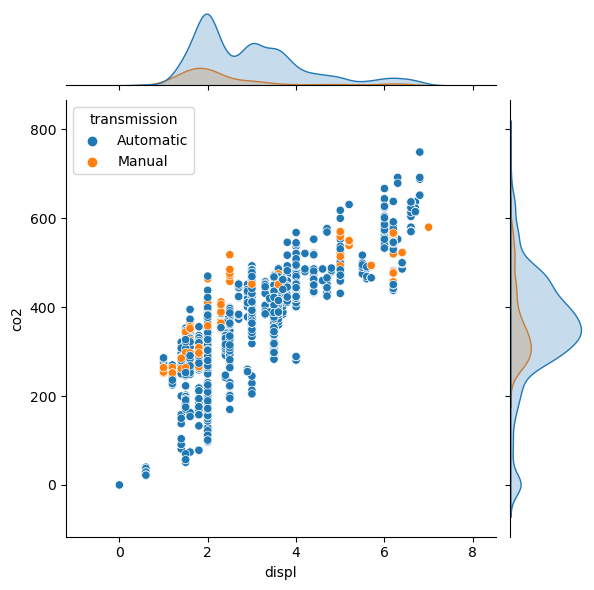

In [9]:
sns.jointplot(data = car_class_df, x = 'displ', y = 'co2', hue = 'transmission')

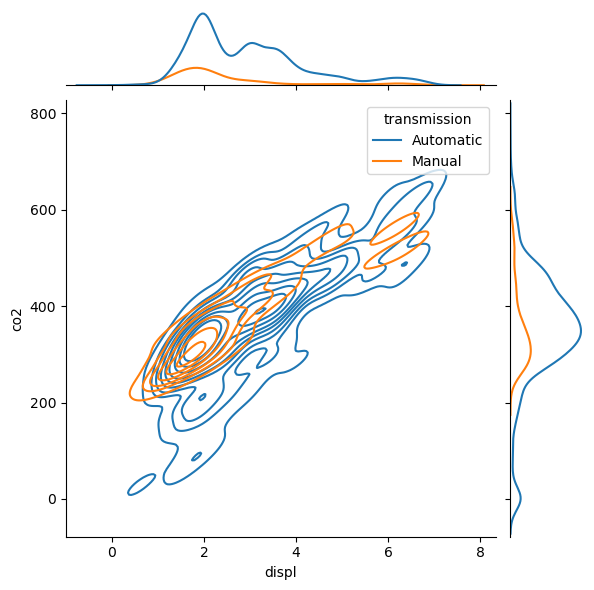

In [10]:
sns.jointplot(data = car_class_df, x = 'displ', y = 'co2', hue = 'transmission', kind = 'kde')